# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

## Loading the dataset

In [2]:
df = pd.read_csv('Data_Set.csv')

#### Checking the header of the datset by calling .head function

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### checking the datatype info 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Splitting the dataset in to independent variable and dependent variable

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
X = df[['datetime','season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered']] 
# feature 'casual' and 'registeres' gives the total values as 'count' which is the target variable in this dataset,
#these two features will be removed later.

In [7]:
y = df['count']

In [8]:
#X.head(2)

In [9]:
#y.head(2)

#### splitting the dataset into train and test dataframe

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.25, random_state= 42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8164, 11), (2722, 11), (8164,), (2722,))

In [11]:
#xtrain.head()

In [12]:
ytrain.head()

2930     35
7669    251
1346     53
9432    296
453      16
Name: count, dtype: int64

# ______________________________
#### 1 <==> Clear, Few clouds, Partly cloudy, Partly cloudy
#### 2 <==> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### 3 <==> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#### 4 <==> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<AxesSubplot:xlabel='weather', ylabel='count'>

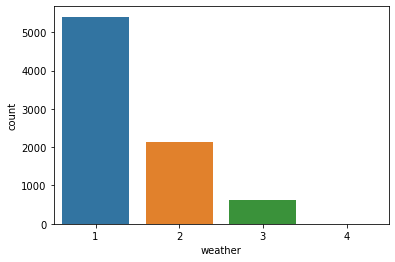

In [13]:
sns.countplot(x = xtrain['weather'])

#### the above count plot gives us information about number of rentals during different weather condition.

In [14]:
xtrain['datetime']  = pd.to_datetime(xtrain['datetime'], dayfirst = True) # converting datetime feature from object to datetime object

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/1883994923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['datetime']  = pd.to_datetime(xtrain['datetime'], dayfirst = True) # converting datetime feature from object to datetime object


In [15]:
#xtrain.head()

In [16]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8164 entries, 2930 to 7270
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    8164 non-null   datetime64[ns]
 1   season      8164 non-null   int64         
 2   holiday     8164 non-null   int64         
 3   workingday  8164 non-null   int64         
 4   weather     8164 non-null   int64         
 5   temp        8164 non-null   float64       
 6   atemp       8164 non-null   float64       
 7   humidity    8164 non-null   int64         
 8   windspeed   8164 non-null   float64       
 9   casual      8164 non-null   int64         
 10  registered  8164 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1023.4 KB


#### creating new features from datetime feature for both xtrain and xtest dataframe

In [17]:
xtrain['year'] = xtrain['datetime'].dt.year

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/4136973592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['year'] = xtrain['datetime'].dt.year


In [18]:
xtrain['day'] = xtrain['datetime'].dt.day

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/1275354300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['day'] = xtrain['datetime'].dt.day


In [19]:
xtrain['month'] = xtrain['datetime'].dt.month

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/3412509816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['month'] = xtrain['datetime'].dt.month


In [20]:
xtrain['hour'] = xtrain['datetime'].dt.hour

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/434067502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['hour'] = xtrain['datetime'].dt.hour


In [21]:
xtrain['week'] = xtrain['datetime'].dt.week

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/476659384.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  xtrain['week'] = xtrain['datetime'].dt.week
C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/476659384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['week'] = xtrain['datetime'].dt.week


In [22]:
xtrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011,11,7,0,28
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012,18,5,22,20
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,12,41,2011,1,4,23,13
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,70,226,2012,16,9,9,37
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,1,15,2011,1,2,23,5


In [23]:
xtest['datetime']  = pd.to_datetime(xtest['datetime'], dayfirst = True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/694522273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['datetime']  = pd.to_datetime(xtest['datetime'], dayfirst = True)


In [24]:
xtest['year'] = xtest['datetime'].dt.year

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/1362045320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['year'] = xtest['datetime'].dt.year


In [25]:
xtest['day'] = xtest['datetime'].dt.day

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/2462744701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['day'] = xtest['datetime'].dt.day


In [26]:
xtest['month'] = xtest['datetime'].dt.month

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/2200862996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['month'] = xtest['datetime'].dt.month


In [27]:
xtest['hour'] = xtest['datetime'].dt.hour

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/1217883633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['hour'] = xtest['datetime'].dt.hour


In [28]:
xtest['week'] = xtest['datetime'].dt.week

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/1138733905.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  xtest['week'] = xtest['datetime'].dt.week
C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/1138733905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['week'] = xtest['datetime'].dt.week


In [29]:
xtest.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
3133,2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,29,98,2011,19,7,11,29
5786,2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,0,13,2012,16,1,6,3
5224,2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,12,151,2011,11,12,18,49


## Basic EDA

#### Visualizing Count Vs various parameters 

Text(0, 0.5, 'Total_Counts')

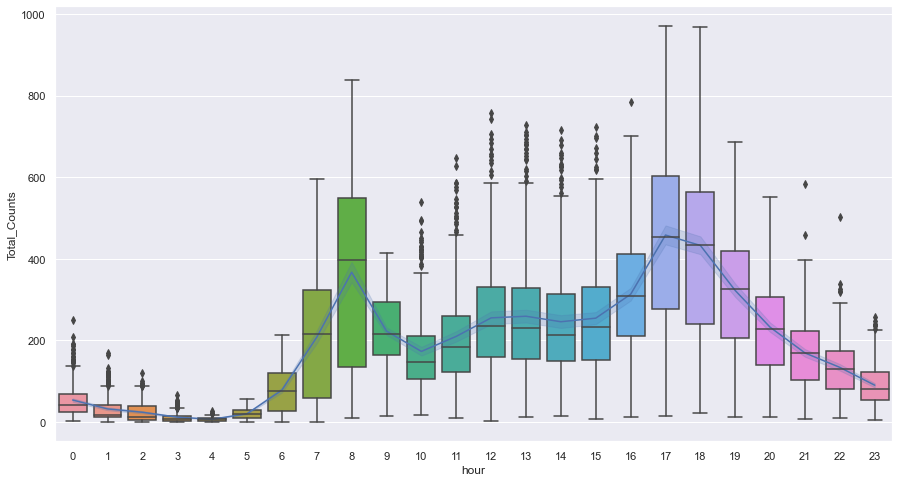

In [30]:
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), ax= ax)
sns.lineplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), ax =ax)
plt.ylabel('Total_Counts')


Text(0, 0.5, 'Total_Counts')

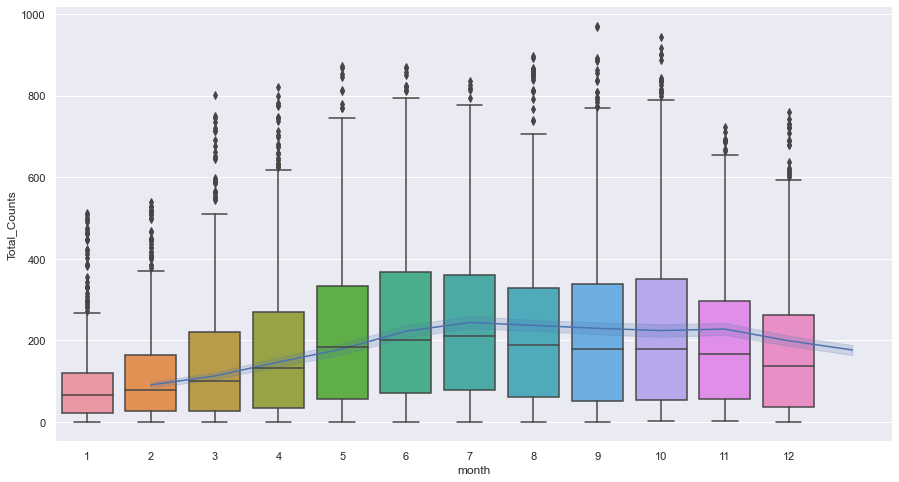

In [31]:
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['month'], y = (xtrain['casual'] + xtrain['registered']), ax =ax)
sns.lineplot(x = xtrain['month'], y = (xtrain['casual'] + xtrain['registered']), ax =ax)
plt.ylabel('Total_Counts')

Text(0, 0.5, 'Total_Counts')

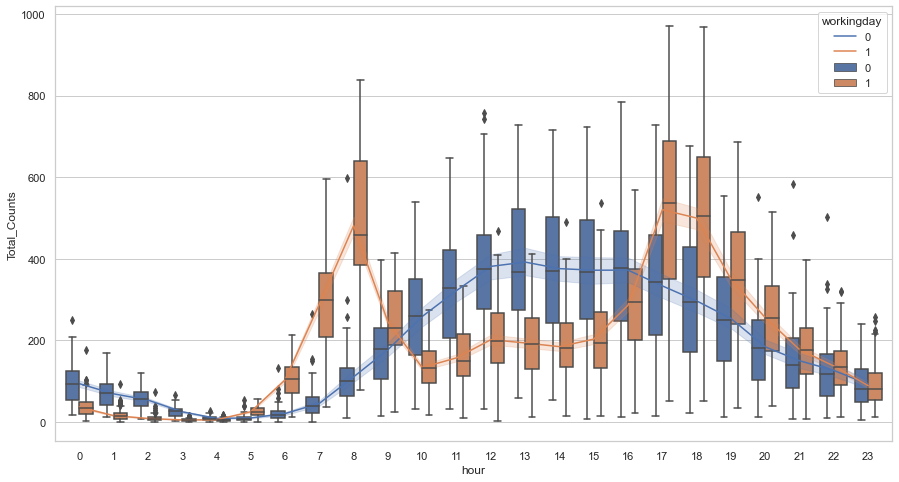

In [32]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['workingday'] , ax = ax)
sns.lineplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['workingday'] , ax = ax)
plt.ylabel('Total_Counts')

Text(0, 0.5, 'Total_Counts')

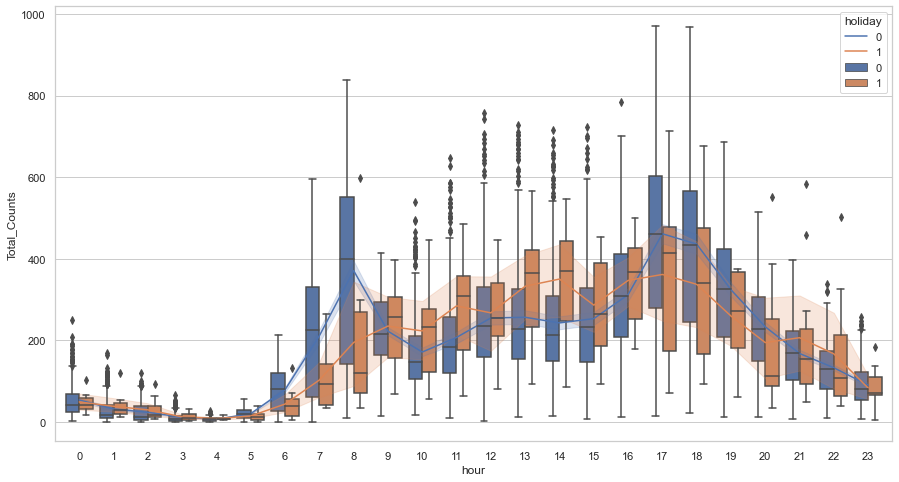

In [33]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['holiday'] , ax = ax)
sns.lineplot(x = xtrain['hour'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['holiday'] , ax = ax)
plt.ylabel('Total_Counts')

Text(0, 0.5, 'Total_Counts')

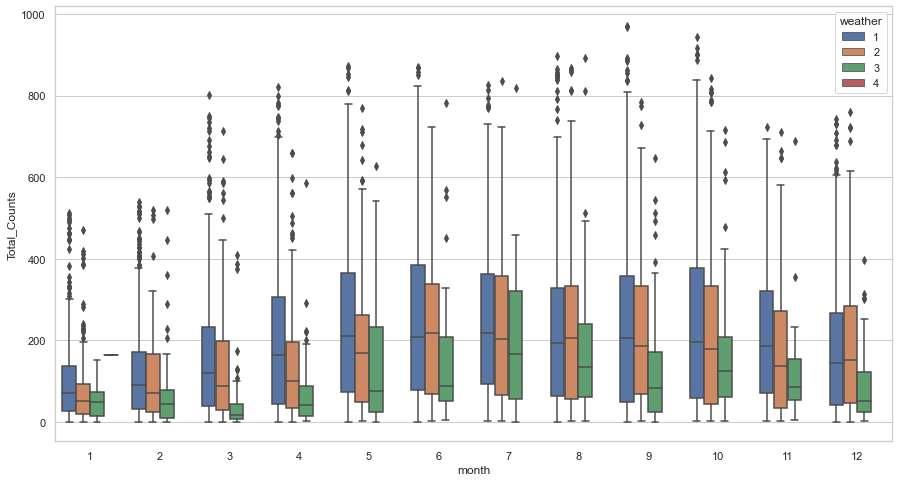

In [34]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = xtrain['month'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['weather'] , ax = ax)
#sns.lineplot(x = xtrain['month'], y = (xtrain['casual'] + xtrain['registered']), hue = xtrain['weather'] , ax = ax)
plt.ylabel('Total_Counts')

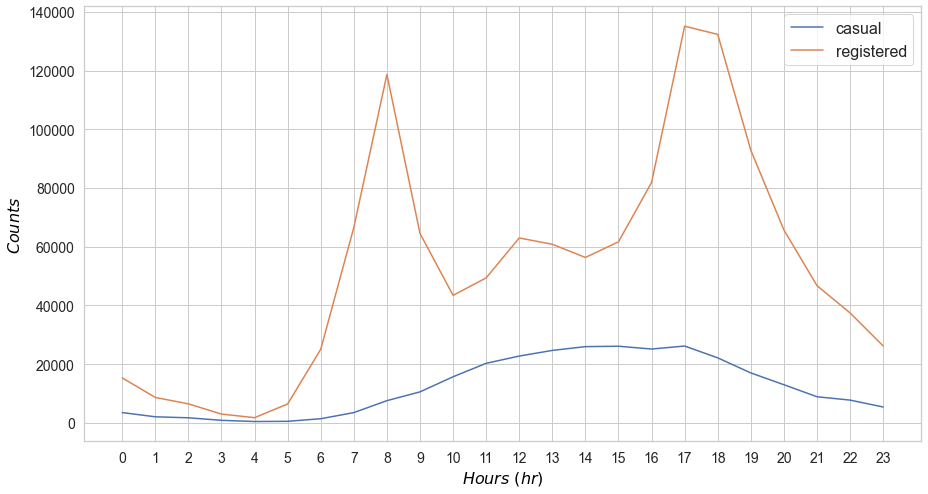

In [35]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

hourly_counts = xtrain.groupby(by = ['hour']).sum()
hourly_counts.head()
hourly_counts.reset_index(inplace=True)


#ax.plot(hourly_counts['hour'], hourly_counts['casual'], 'bo', hourly_counts['hour'], hourly_counts['registered'], 'r+' )
sns.lineplot(x = hourly_counts['hour'], y = hourly_counts['casual'], markers= '*', ax = ax )
sns.lineplot(x = hourly_counts['hour'], y = hourly_counts['registered'],markers= '*', ax = ax)
#sns.scatterplot(x = hourly_counts['hour'], y = hourly_counts['casual'], ax = ax )
#sns.scatterplot(x = hourly_counts['hour'], y = hourly_counts['registered'], ax = ax)
plt.xlabel(r'$Hours$ $(hr)$', fontdict = font)
plt.ylabel(r'$Counts$ ', fontdict = font)
plt.xticks(np.arange(hourly_counts['hour'].min(), (hourly_counts['hour'].max()+1), 1), fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(['casual','registered'], prop={"size":16})


In [36]:
monthly_counts = xtrain.groupby(by = ['month']).sum()
monthly_counts.head()
monthly_counts.reset_index(inplace=True)

In [37]:
monthly_counts.head()

,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,hour,week
0,1,650,55,394,901,6353.36,7809.900,36059,9391.2359,5413,53579,1307479,6306,7779,3642
1,2,678,0,479,985,8050.76,9941.615,38308,9280.2437,7431,68925,1363815,6826,7815,4111
2,3,679,0,481,959,10778.90,12880.795,38305,10529.1840,18103,81535,1365808,6693,7849,6864
3,4,1330,36,435,949,12491.06,14885.265,37106,10464.1806,28266,90702,1337646,6714,7638,9703
4,5,1398,0,525,1068,15862.08,18623.535,47303,8783.0970,31771,123765,1406039,7037,8114,13202


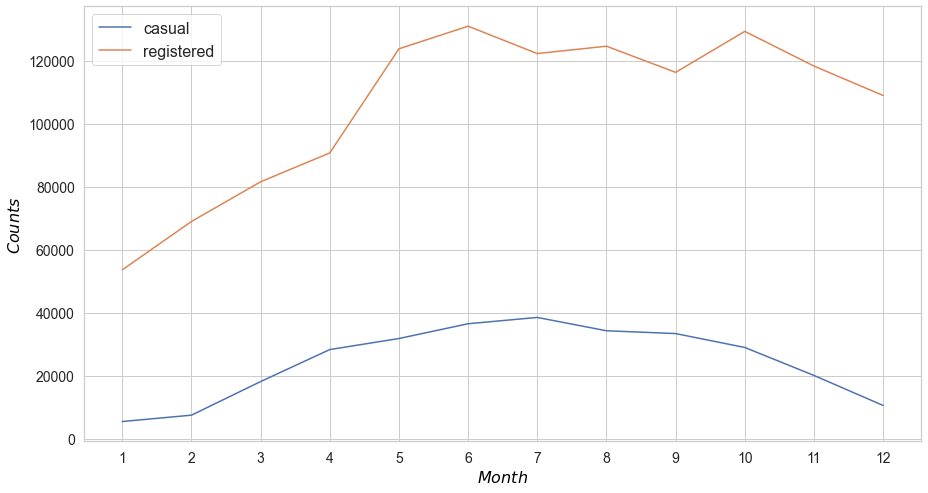

In [38]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }



sns.lineplot(x = monthly_counts['month'], y = monthly_counts['casual'], markers= '*', ax = ax )
sns.lineplot(x = monthly_counts['month'], y = monthly_counts['registered'],markers= '*', ax = ax)

plt.xlabel(r'$Month$ ', fontdict = font)
plt.ylabel(r'$Counts$ ', fontdict = font)
plt.xticks(np.arange(monthly_counts['month'].min(), (monthly_counts['month'].max()+1), 1), fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(['casual','registered'], prop={"size":16})

In [39]:
#monthly_counts.head()

In [40]:
xtrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011,11,7,0,28
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012,18,5,22,20
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,12,41,2011,1,4,23,13
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,70,226,2012,16,9,9,37
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,1,15,2011,1,2,23,5


In [41]:
grp_weather = xtrain.groupby(by = ['weather'])['casual','registered'].sum()
grp_weather.head()
grp_weather.reset_index(inplace=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/2136762159.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_weather = xtrain.groupby(by = ['weather'])['casual','registered'].sum()


In [42]:
grp_weather.head()

,weather,casual,registered
0,1,216067,892597
1,2,65806,311525
2,3,11102,64837
3,4,6,158


<AxesSubplot:xlabel='weather', ylabel='casual'>

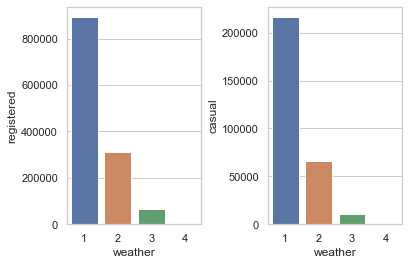

In [43]:
fig, axes = plt.subplots(1, 2)

sns.barplot(data = grp_weather, x  = 'weather', y  ='registered', ax = axes[0])
plt.subplots_adjust(hspace = 0.8, wspace = 0.5)
sns.barplot(data = grp_weather, x  = 'weather', y  ='casual',ax = axes[1])

In [44]:
grp_season = xtrain.groupby(by = ['season'])['casual','registered'].sum()
grp_season.head()
grp_season.reset_index(inplace=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/3434832368.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_season = xtrain.groupby(by = ['season'])['casual','registered'].sum()


<AxesSubplot:xlabel='season', ylabel='casual'>

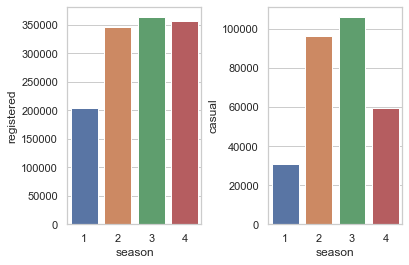

In [45]:
fig, axes = plt.subplots(1, 2)
sns.barplot(data = grp_season, x  = 'season', y  ='registered', ax = axes[0])
plt.subplots_adjust(hspace = 0.8, wspace = 0.5)
sns.barplot(data = grp_season, x  = 'season', y  ='casual', ax = axes[1])

In [46]:
grp_holiday = xtrain.groupby(by = ['holiday'])['casual','registered'].sum()
grp_holiday.reset_index(inplace=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_28492/2629218307.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_holiday = xtrain.groupby(by = ['holiday'])['casual','registered'].sum()


In [47]:
grp_holiday.head()

,holiday,casual,registered
0,0,281062,1236803
1,1,11919,32314


<AxesSubplot:xlabel='holiday', ylabel='registered'>

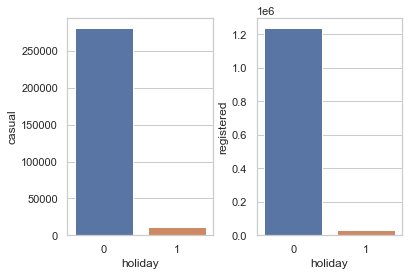

In [48]:

fig, axes = plt.subplots(1, 2)
sns.barplot(data = grp_holiday, x  = 'holiday', y  ='casual', ax = axes[0])
plt.subplots_adjust(hspace = 0.8, wspace = 0.3)
sns.barplot(data = grp_holiday, x  = 'holiday', y  ='registered', ax = axes[1])

<AxesSubplot:xlabel='humidity', ylabel='Count'>

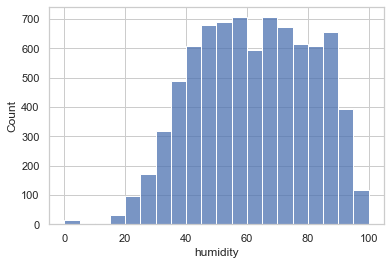

In [49]:
sns.histplot(data = xtrain, x  = 'humidity', bins= 20)

<AxesSubplot:xlabel='temp', ylabel='Count'>

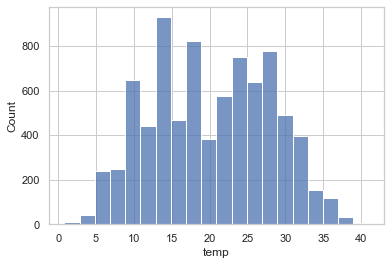

In [50]:
sns.histplot(data = xtrain, x  = 'temp', bins= 20)

#### Short summary from the EDA
##### 1. On the weekdays the bike rental demand is pretty high during the mornings (7AM to 10AM) and evenings (4PM tp 7PM)  this is the time when many plan a commute to and fro from home - offices, schools and collegs .Whereas the unregistered users have generated demand during later morning to evenings which can be clearley seen in above plots.
##### 2. for non-working days and holidays the demand looks the same and its mainly generated during later mornings to evenings.
##### 3. It looks quiet obvious that people tend to rent bike during summer and spring part of the year as it is really comfortable to ride bike during those season, hence we see realy high demand in bicycle rental durin the month from May to October (this deman is mainly generated by registered users). 
##### 4. Looking at the monthly deman for both registered and casual (non registered users) we almost 5 times hihger deman for registered users.



In [51]:
xtrain.columns 

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'day',
       'month', 'hour', 'week'],
      dtype='object')

In [52]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [53]:
xtrain_cmap = xtrain[[ 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','casual', 'registered', 'year', 'day',
       'month', 'hour', 'week']]
xtrain_cmap.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,week
2930,3,0,1,1,28.70,32.575,65,12.9980,10,25,2011,11,7,0,28
7669,2,0,1,1,22.96,26.515,52,22.0028,57,194,2012,18,5,22,20
1346,2,0,1,1,12.30,15.910,61,6.0032,12,41,2011,1,4,23,13
9432,3,0,0,1,23.78,27.275,60,8.9981,70,226,2012,16,9,9,37
453,1,0,1,3,8.20,9.850,93,12.9980,1,15,2011,1,2,23,5


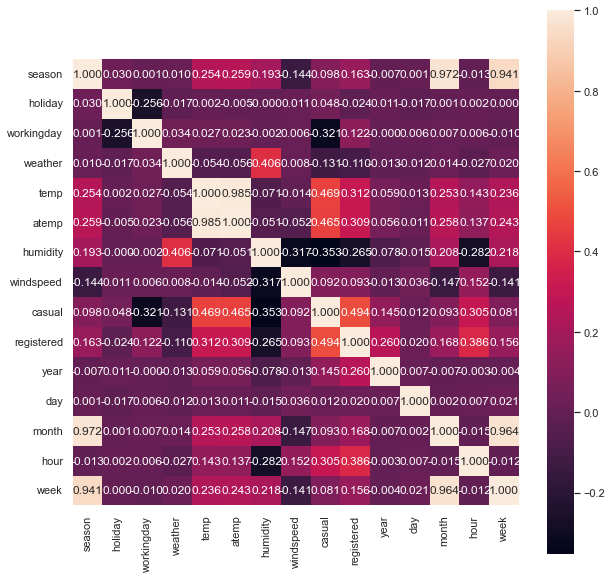

In [54]:
corrmat = xtrain_cmap.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot = True, square = True, fmt = '.3f')
plt.show()

##### Coorelation map is once of hte simplest way to understand how variable (features) depend on each other and how well coorealted they are.

##### Imp*** We need to ignore those feature which are highly coorelated with each other (except with target feature) as they will make it really difficult for the model to fit .
##### Imp *** During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

#### Its clear from the above corr plot that:

##### 1. hour is in strong cooreation with target variable (casual + registeres = counts)
##### 2. temp is also in strong coorealtion with the target variable 
##### 3. we drop 'atemp' , 'holiday' and 'week' as these variable is in strong coorelation with 'temp' , 'workingday' and 'month' and in model building such feature with such     strong correlation with each other will exhibit multicollinearity in the data.
##### 4. After playing around with the features we finally found some important feature which plays a crutial role in bike       prediction demand ['workingday','temp','day', 'year','month','hour']

In [55]:
# initially we start with 10features as I dint want to be biased amd laters I tailed these feature using different method for removing multicolinearity features
xtrain_lr = xtrain[[ 'season', 'workingday', 'weather', 'temp',
        'humidity', 'windspeed', 'year', 'day',
       'month', 'hour']]
xtrain_lr.head(3)


,season,workingday,weather,temp,humidity,windspeed,year,day,month,hour
2930,3,1,1,28.70,65,12.9980,2011,11,7,0
7669,2,1,1,22.96,52,22.0028,2012,18,5,22
1346,2,1,1,12.30,61,6.0032,2011,1,4,23


## Steps for filtering features for the final model.
## Method1 :  Variance Inflation Factor

##### It measures the amount of Multicollinearity (you can express one input feature by a combination of others input features) among the independent variables in a multiple regression model

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant
from statsmodels.api import add_constant

In [57]:
xtrain_lr = add_constant(xtrain_lr)

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
# for each input feature calculate the VIF
n_columns = xtrain_lr.shape[1]
vifs = []

for i in range(n_columns):
    vif = variance_inflation_factor(xtrain_lr.values,i)
    #print(vif)
    vifs.append(vif)
vifs

[16391270.279259706,
 17.949352280164657,
 1.0029657309440705,
 1.2484948277043322,
 1.1092606363895623,
 1.5464403335384012,
 1.1544164477781695,
 1.01261804089452,
 1.0017106007065166,
 18.064898933843697,
 1.1224991169616816]

In [59]:
pd.Series(vifs,index = xtrain_lr.columns)

const         1.639127e+07
season        1.794935e+01
workingday    1.002966e+00
weather       1.248495e+00
temp          1.109261e+00
humidity      1.546440e+00
windspeed     1.154416e+00
year          1.012618e+00
day           1.001711e+00
month         1.806490e+01
hour          1.122499e+00
dtype: float64

## Step2
## Selecting statistically significant features

In [60]:
m = OLS(ytrain, add_constant(xtrain_lr))

In [61]:
m_result = m.fit()

In [62]:
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     516.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:24:51   Log-Likelihood:                -52027.
No. Observations:                8164   AIC:                         1.041e+05
Df Residuals:                    8153   BIC:                         1.042e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.646e+05   6354.088    -25.905      0.0

## Step3
## Use Random Forest Feature Importance

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
random_forest = RandomForestRegressor(max_depth=5, random_state=0)

In [65]:
random_forest.fit(xtrain_lr, ytrain)

RandomForestRegressor(max_depth=5, random_state=0)

In [66]:
feature_importance_dict = {'importance': random_forest.feature_importances_, 'feature': xtrain_lr.columns}

In [67]:
pd.DataFrame(data=feature_importance_dict).sort_values('importance', ascending=False)

,importance,feature
10,7.012422e-01,hour
7,1.325922e-01,year
4,8.948948e-02,temp
9,6.056032e-02,month
1,1.041700e-02,season
2,5.244444e-03,workingday
5,3.446424e-04,humidity
3,1.073587e-04,weather
8,2.189112e-06,day
6,1.439805e-07,windspeed


## Recursive Feature Elimination

In [68]:
from sklearn.feature_selection import RFE

In [69]:
# Instantiate estimator
m_sl = LinearRegression()
m_sl.fit(xtrain_lr, ytrain)

LinearRegression()

In [70]:
rfe = RFE(estimator= m_sl,verbose=1,n_features_to_select=5)
rfe.fit(xtrain_lr, ytrain)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=LinearRegression(), n_features_to_select=5, verbose=1)

In [71]:
# Input feature
xtrain_lr.head()

,const,season,workingday,weather,temp,humidity,windspeed,year,day,month,hour
2930,1.0,3,1,1,28.70,65,12.9980,2011,11,7,0
7669,1.0,2,1,1,22.96,52,22.0028,2012,18,5,22
1346,1.0,2,1,1,12.30,61,6.0032,2011,1,4,23
9432,1.0,3,0,1,23.78,60,8.9981,2012,16,9,9
453,1.0,1,1,3,8.20,93,12.9980,2011,1,2,23


In [72]:
rfe.support_ 

array([False, False, False,  True,  True, False, False,  True, False,
        True,  True])

In [73]:
rfe.ranking_

array([7, 2, 4, 1, 1, 3, 5, 1, 6, 1, 1])

In [74]:
feature_to_include = xtrain_lr.columns[rfe.support_]
feature_to_include

Index(['weather', 'temp', 'year', 'month', 'hour'], dtype='object')

In [75]:
print(f'Including only the features {feature_to_include}\nR^2 score  is {round(rfe.score(xtrain_lr, ytrain),2)}')

Including only the features Index(['weather', 'temp', 'year', 'month', 'hour'], dtype='object')
R^2 score  is 0.35


In [76]:
xtrain_lr.drop(['const'], axis = 1, inplace= True)

In [77]:
xtrain_lr.head()

,season,workingday,weather,temp,humidity,windspeed,year,day,month,hour
2930,3,1,1,28.70,65,12.9980,2011,11,7,0
7669,2,1,1,22.96,52,22.0028,2012,18,5,22
1346,2,1,1,12.30,61,6.0032,2011,1,4,23
9432,3,0,1,23.78,60,8.9981,2012,16,9,9
453,1,1,3,8.20,93,12.9980,2011,1,2,23


##### Finally we found some important feature to use in the model and after few trial of running the model, I came to a final list of feature: ['workingday','temp','day', 'year','month','hour'] 

In [78]:
xtrain_lr_final = xtrain_lr[['workingday','temp','day', 'year','month','hour']]

In [79]:
xtrain_lr_final = xtrain_lr_final.astype({'workingday':'object','year':'object','hour':'object','month':'object'})
# 'workingday': object, 'holiday': object, 'month':object,'weather': object,

In [80]:
xtrain_lr_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8164 entries, 2930 to 7270
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   workingday  8164 non-null   object 
 1   temp        8164 non-null   float64
 2   day         8164 non-null   int64  
 3   year        8164 non-null   object 
 4   month       8164 non-null   object 
 5   hour        8164 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 704.5+ KB


In [81]:
# Select Categorical and numeric features

categorical_col = xtrain_lr_final.select_dtypes(include='object').columns
numeric_col =xtrain_lr_final.select_dtypes(include='number').columns

In [82]:
categorical_col

Index(['workingday', 'year', 'month', 'hour'], dtype='object')

In [83]:
numeric_col

Index(['temp', 'day'], dtype='object')

## Scaling of the features

In [84]:
# Defining transformer
ohe = OneHotEncoder()
scaler = MinMaxScaler()
scaler_rob = RobustScaler()
transformers = [('ohe', OneHotEncoder(drop = 'first'), categorical_col),
               ('scaler', MinMaxScaler(), ['temp', 'day'])]

In [85]:
# Define column transformer
column_transformer = ColumnTransformer(
    transformers=transformers, remainder='drop')

In [86]:
# Fit and transform the column transformer ONLY on Xtrain
Xtrain_lr_tf = column_transformer.fit_transform(xtrain_lr_final)

# Transform Xtest
#Xtest_fe = column_transformer.transform(Xtest)

In [87]:
# Simillarly for Xtest

xtest_lr = xtest[['workingday','temp','day', 
        'year','month',
       'hour']]
xtest_lr.head(3)
#'workingday', 'holiday','year','month',

,workingday,temp,day,year,month,hour
3133,1,33.62,19,2011,7,11
5786,0,4.10,16,2012,1,6
5224,0,9.84,11,2011,12,18


In [88]:
xtest_lr = xtest_lr.astype({'workingday':'object','year':'object','hour':'object','month':'object'})
#'workingday': object, 'holiday': object,'year': object, 'month':object,

In [89]:
xtest_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 3133 to 12
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   workingday  2722 non-null   object 
 1   temp        2722 non-null   float64
 2   day         2722 non-null   int64  
 3   year        2722 non-null   object 
 4   month       2722 non-null   object 
 5   hour        2722 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 148.9+ KB


In [90]:
Xtest_lr_tf = column_transformer.transform(xtest_lr)

In [91]:
Xtest_lr_tf

<2722x38 sparse matrix of type '<class 'numpy.float64'>'
	with 13591 stored elements in Compressed Sparse Row format>

In [92]:
 Xtest_lr_tf.todense()

matrix([[1.        , 0.        , 0.        , ..., 0.        , 0.81632653,
         1.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.08163265,
         0.83333333],
        [0.        , 0.        , 0.        , ..., 0.        , 0.2244898 ,
         0.55555556],
        ...,
        [1.        , 0.        , 0.        , ..., 0.        , 0.65306122,
         0.55555556],
        [0.        , 0.        , 0.        , ..., 0.        , 0.65306122,
         0.83333333],
        [0.        , 0.        , 0.        , ..., 0.        , 0.40816327,
         0.        ]])

In [93]:
Xtrain_lr_tf.todense()

matrix([[1.        , 0.        , 0.        , ..., 0.        , 0.69387755,
         0.55555556],
        [1.        , 1.        , 0.        , ..., 0.        , 0.55102041,
         0.94444444],
        [1.        , 0.        , 0.        , ..., 1.        , 0.28571429,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.26530612,
         0.94444444],
        [0.        , 0.        , 1.        , ..., 0.        , 0.36734694,
         1.        ],
        [1.        , 1.        , 0.        , ..., 0.        , 0.53061224,
         0.05555556]])

In [94]:
Xtrain_lr_tf = pd.DataFrame(Xtrain_lr_tf.todense())

In [95]:
Xtrain_lr_tf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693878,0.555556
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.551020,0.944444
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.000000


In [96]:
Xtest_lr_tf = pd.DataFrame(Xtest_lr_tf.todense())

In [97]:
Xtest_lr_tf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816327,1.000000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081633,0.833333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.224490,0.555556


# Training the Model

In [98]:
pipe1 = Pipeline(steps=[('coltransf1',column_transformer),
                 ('model1',LinearRegression())])

pipe1.fit(xtrain_lr_final,ytrain)

print(f"""The train accuracy of pipeline 1 is: {round(pipe1.score(xtrain_lr_final,ytrain),3)}
The test accuracy of pipeline 1 is: {round(pipe1.score(xtest_lr,ytest),3)}""")

The train accuracy of pipeline 1 is: 0.675
The test accuracy of pipeline 1 is: 0.665


# Polynomial Expansion of the features

In [99]:
# Let's define a degree for the polinomial
deg = 2

# Instantiate the transformation 
poly = PolynomialFeatures(degree=deg, interaction_only= True)

In [100]:
# fit and transform on X_train
Xtrain_lr_tf_pol = poly.fit_transform(Xtrain_lr_tf)

#transform only on X_test
Xtest_lr_tf_pol = poly.transform(Xtest_lr_tf) 

In [101]:
Xtrain_lr_tf_pol

array([[1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.38548753],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.52040816],
       [1.        , 1.        , 0.        , ..., 0.28571429, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25056689],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.36734694],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.02947846]])

In [102]:
Xtest_lr_tf_pol

array([[1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.81632653],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.06802721],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12471655],
       ...,
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.36281179],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.54421769],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# fitting a linear model to polynomial data

In [103]:
lr_poly = LinearRegression().fit(Xtrain_lr_tf_pol, ytrain)

In [104]:
lr_poly.score(Xtrain_lr_tf_pol, ytrain)

0.8974239828692444

In [105]:
ypred_poly_train = lr_poly.predict(Xtrain_lr_tf_pol)
ypred_poly_train


array([ 65.921875 , 185.765625 ,  54.9453125, ..., 232.7734375,
       -52.3203125, 313.90625  ])

In [106]:
ypred_poly = lr_poly.predict(Xtest_lr_tf_pol)
ypred_poly

array([143.1640625, -27.9375   ,  80.21875  , ...,  38.46875  ,
        84.9375   , 201.0703125])

In [107]:
lr_poly.score(Xtest_lr_tf_pol, ytest)

0.8828294387415563

In [108]:
# Reduce the complexity through regularization

m_lasso = Lasso(alpha=0.025, random_state=50)
 
m_lasso.fit(Xtrain_lr_tf_pol, ytrain)     

ypred_lasso = m_lasso.predict(Xtest_lr_tf_pol)
ypred_lasso_train = m_lasso.predict(Xtrain_lr_tf_pol)

m_lasso_r2 = m_lasso.score(Xtrain_lr_tf_pol, ytrain)
m_lasso_r2_t = m_lasso.score(Xtest_lr_tf_pol, ytest)
m_lasso_rmse = np.sqrt(mean_squared_error(ytest,ypred_lasso))
m_lasso_mae = np.sqrt(mean_absolute_error(ytest,ypred_lasso))



In [109]:
print('*'*100)
print('*'*50)
print('m_lasso_r2:', round(m_lasso_r2, 3)*100, '%')
print('m_lasso_r2_t:', round(m_lasso_r2_t,3)*100, '%')
print('m_lasso_mae:',round(m_lasso_mae,3))
print('*'*50)
print('*'*100)


****************************************************************************************************
**************************************************
m_lasso_r2: 89.3 %
m_lasso_r2_t: 88.1 %
m_lasso_mae: 6.454
**************************************************
****************************************************************************************************


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

In [111]:
#split = StratifiedShuffleSplit(n_splits=5,test_size=.25,random_state= 25)

cross_validation_lr_pol = cross_val_score(estimator=lr_poly, # the model to evaluate
                                     X=Xtrain_lr_tf_pol,
                                     y=ytrain,
                                     scoring='r2', # evaluation metrics
                                     cv= 10, # cross validation splitting
                                     verbose=3) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.864) total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.869) total time=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.890) total time=   0.2s
[CV] END ................................ score: (test=0.900) total time=   0.2s
[CV] END ................................ score: (test=0.905) total time=   0.2s
[CV] END ................................ score: (test=0.860) total time=   0.2s
[CV] END ................................ score: (test=0.878) total time=   0.1s
[CV] END ................................ score: (test=0.902) total time=   0.2s
[CV] END ................................ score: (test=0.887) total time=   0.1s
[CV] END ................................ score: (test=0.883) total time=   0.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished


In [112]:
print(f'Validation accuracy scores: {np.round(cross_validation_lr_pol,2)}')
print(f'\nmean: {cross_validation_lr_pol.mean():.2}')
print(f'std: {cross_validation_lr_pol.std():.1}')

Validation accuracy scores: [0.86 0.87 0.89 0.9  0.9  0.86 0.88 0.9  0.89 0.88]

mean: 0.88
std: 0.02


In [113]:
cross_val = np.round(cross_validation_lr_pol,2)

In [114]:
cross_val

array([0.86, 0.87, 0.89, 0.9 , 0.9 , 0.86, 0.88, 0.9 , 0.89, 0.88])

In [115]:
cross_val = pd.DataFrame(cross_val, columns=['cross_val'])

In [116]:
cross_val = cross_val.reset_index()

In [117]:
cross_val = cross_val.rename(columns={'index': 'Number_of_runs'})

In [118]:
cross_val['Number_of_runs'] = cross_val['Number_of_runs'] +1 

In [119]:
cross_val

,Number_of_runs,cross_val
0,1,0.86
1,2,0.87
2,3,0.89
3,4,0.90
4,5,0.90
5,6,0.86
6,7,0.88
7,8,0.90
8,9,0.89
9,10,0.88


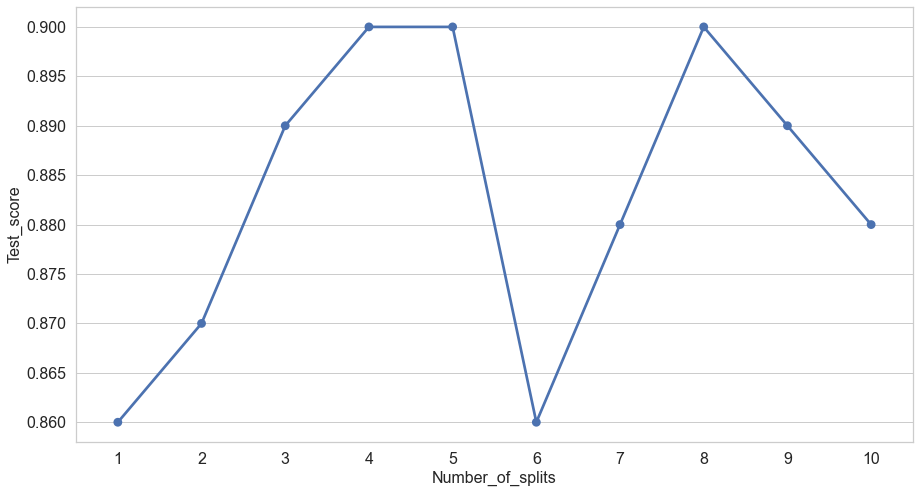

In [120]:
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(data = cross_val, x  = 'Number_of_runs', y = 'cross_val', ax= ax)
plt.xlabel('Number_of_splits',fontsize = 16)
plt.ylabel('Test_score',fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

## Checking Support Vector Regressor ML Model with the transfomed data.

In [121]:
from sklearn.svm import SVR

In [122]:
svr = SVR(kernel='linear', C = 100, gamma='auto', epsilon=10, tol=0.001, coef0=2)
svr.fit(Xtrain_lr_tf_pol, ytrain)

SVR(C=100, coef0=2, epsilon=10, gamma='auto', kernel='linear')

In [123]:
print('Training_Score_SVR:', round(svr.score(Xtrain_lr_tf_pol, ytrain),2)*100, '%',
      '\nTesting_Score_SVR:', round(svr.score(Xtest_lr_tf_pol, ytest),2)*100, '%' )

Training_Score_SVR: 89.0 % 
Testing_Score_SVR: 88.0 %


In [124]:
ypred_svr = svr.predict(Xtest_lr_tf_pol)

In [125]:
cross_validation_lr_pol_SVR = cross_val_score(estimator=svr, # the model to evaluate
                                     X=Xtrain_lr_tf_pol,
                                     y=ytrain,
                                     scoring='r2', # evaluation metrics
                                     cv= 10, # cross validation splitting
                                     verbose=3) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.859) total time=  21.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.2s remaining:    0.0s


[CV] END ................................ score: (test=0.863) total time=  20.9s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   42.2s remaining:    0.0s


[CV] END ................................ score: (test=0.890) total time=  18.7s
[CV] END ................................ score: (test=0.895) total time=  19.5s
[CV] END ................................ score: (test=0.903) total time=  17.6s
[CV] END ................................ score: (test=0.860) total time=  18.1s
[CV] END ................................ score: (test=0.877) total time=  19.1s
[CV] END ................................ score: (test=0.902) total time=  17.1s
[CV] END ................................ score: (test=0.881) total time=  18.6s
[CV] END ................................ score: (test=0.882) total time=  18.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.2min finished


In [126]:
print(f'Validation accuracy scores: {np.round(cross_validation_lr_pol_SVR,2)}')
print(f'\nmean: {cross_validation_lr_pol_SVR.mean():.2}')
print(f'std: {cross_validation_lr_pol_SVR.std():.1}')

Validation accuracy scores: [0.86 0.86 0.89 0.89 0.9  0.86 0.88 0.9  0.88 0.88]

mean: 0.88
std: 0.02


In [127]:
ypred_train = svr.predict(Xtrain_lr_tf_pol)

#### Plot of bicycle demand ('count') versus one of heature 'hour' and an overlay fit of all the 3 models. 

In [128]:
text = print('Training_Score_SVR:', round(svr.score(Xtrain_lr_tf_pol, ytrain),2)*100, '%',
      '\nTesting_Score_SVR:', round(svr.score(Xtest_lr_tf_pol, ytest),2)*100, '%' )

Training_Score_SVR: 89.0 % 
Testing_Score_SVR: 88.0 %


Text(0.25, 820, 'Training_Score = 89% \nTesting_Score = 88% \nMean_Absolute_Error = 6.6')

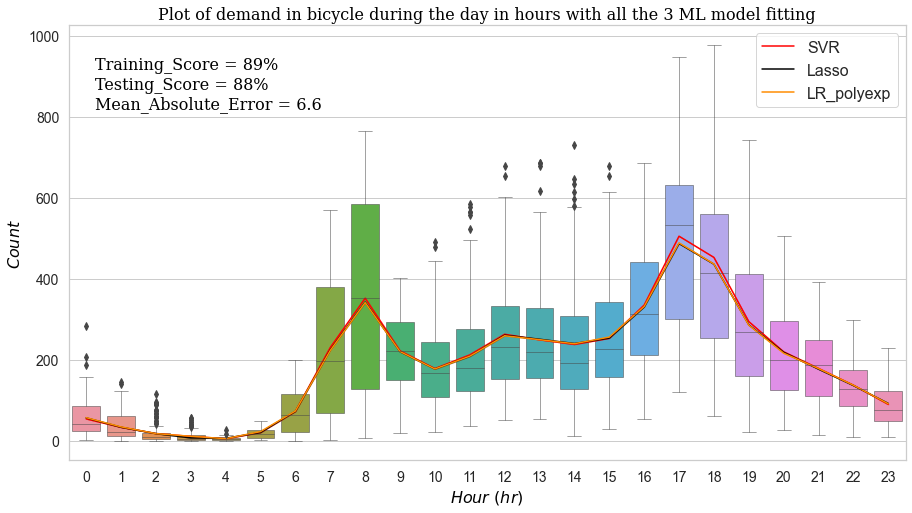

In [129]:
sns.set_theme(context='notebook',
    style='whitegrid',  
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data = xtest_lr, x = 'hour',y = ypred_svr , color='red', ax =ax, ci = 0)
sns.lineplot(data = xtest_lr, x = 'hour',y = ypred_lasso , color='black', ax =ax,  ci = 0)
sns.lineplot(data = xtest_lr, x = 'hour',y = ypred_poly , color='darkorange', ax =ax,  ci = 0)
sns.boxplot(data = xtest_lr, x = 'hour', y = ytest , ax= ax, linewidth= 0.5 )

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('$ Hour $ $(hr)$', fontdict=font)
plt.ylabel('$ Count $',fontdict=font)
plt.legend(['SVR','Lasso','LR_polyexp'], prop={"size":16})
plt.title('Plot of demand in bicycle during the day in hours with all the 3 ML model fitting', fontdict=font)
plt.text(0.25,820,'Training_Score = 89% \nTesting_Score = 88% \nMean_Absolute_Error = 6.6', fontdict=font)


## Overall the model perfomed well  with average 88% test score from cross validation.